In [66]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv(r"E:\AI\data _sets\cancer_patient_data sets.csv")

In [68]:
df.shape

(1000, 25)

In [69]:
# let's preview the dataset

df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


We can see that there are 25 variables in the dataset. 8 are continuous variables and 1 is discrete variable. The discrete variable is target_class variable. It is also the target variable.

Now, I will view the column names to check for leading and trailing spaces.

In [80]:
df['Level'].unique()

array(['Low', 'Medium', 3], dtype=object)

In [81]:
df['Level'].replace('Low',1,inplace=True)
df['Level'].replace('Medium',2,inplace=True)


In [82]:
df['Level'].value_counts()

3    365
2    332
1    303
Name: Level, dtype: int64

In [83]:
df['Level'].replace('High',3,inplace=True)

In [84]:
df['Level'].value_counts()

3    365
2    332
1    303
Name: Level, dtype: int64

<AxesSubplot:>

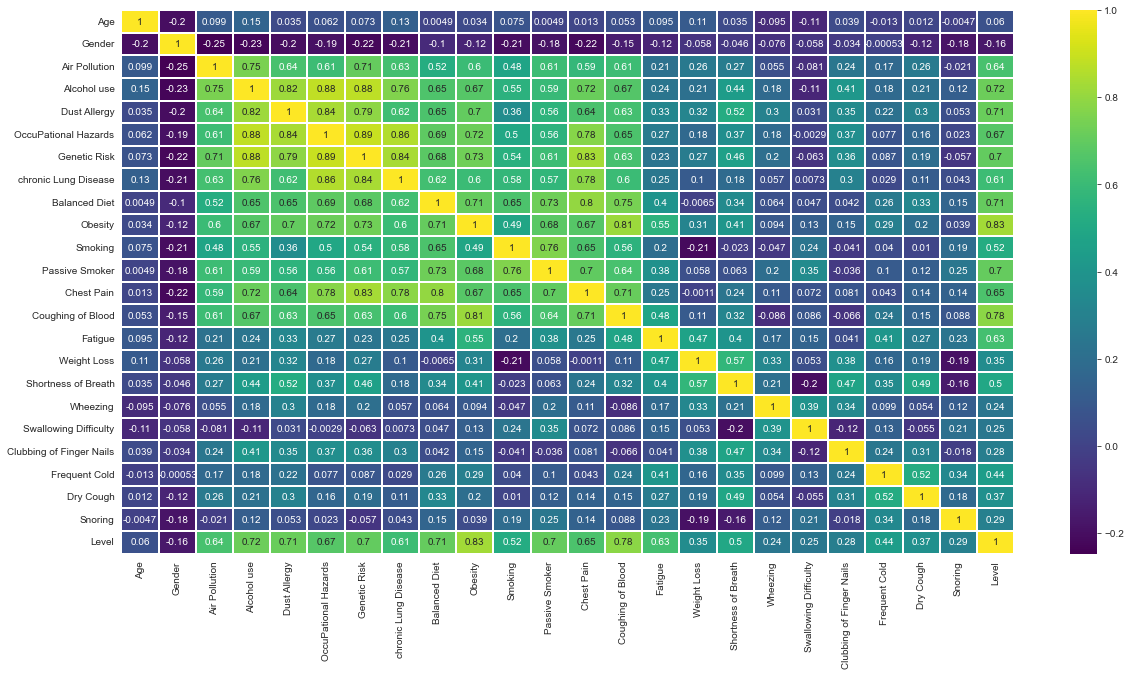

In [85]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="viridis",annot=True,linewidths=0.1)

<AxesSubplot:xlabel='Level', ylabel='count'>

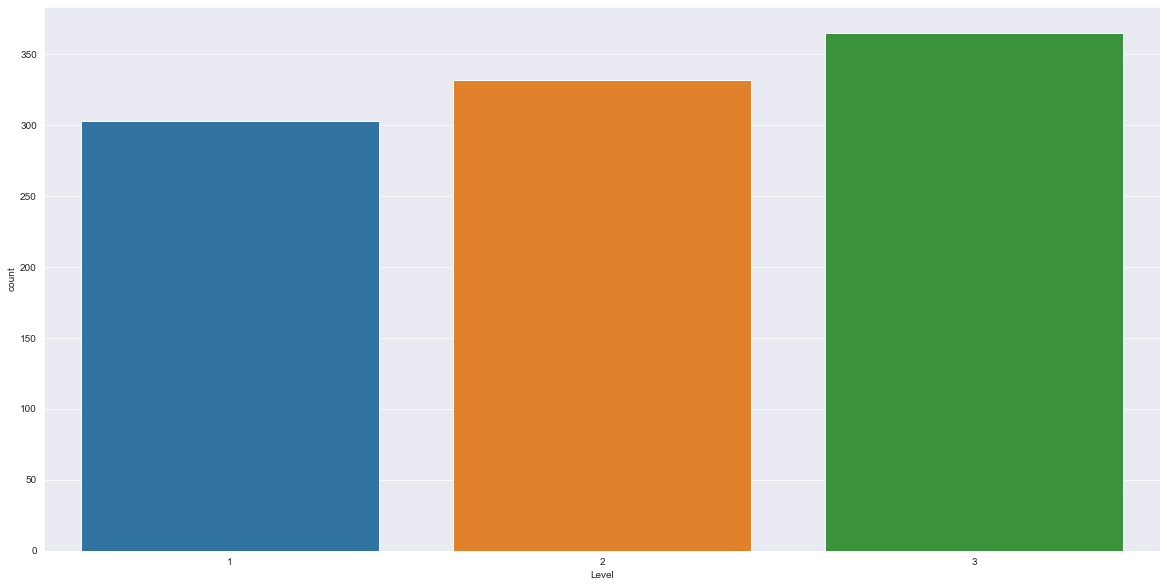

In [86]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.countplot(x="Level",data=df)
#Here we visualize our target column

In [87]:
df.dtypes

Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                        int64
dtype: object

In [88]:
df['Patient Id'] = df['Patient Id'].astype(str)

In [89]:
df['Patient Id'] = df.Patient Id.str.extract(r'\b(\w+)$', expand=True)
print(df)

SyntaxError: invalid syntax (4044649058.py, line 1)

In [90]:
y=df["Level"]
y
# array(['Low', 'Medium', 'High'], dtype=object)

0      1
1      2
2      3
3      3
4      3
      ..
995    3
996    3
997    3
998    3
999    3
Name: Level, Length: 1000, dtype: int64

# . Normalizing and Splitting Data

In [109]:
X=df.drop("Patient Id", axis=1) #Here we assign all the other features as our X independent variables
X


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,3
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,3
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:

scaler=StandardScaler()

In [112]:
X= scaler.fit_transform(X)
X

array([[-0.34784816, -0.81990292, -0.90667901, ..., -0.41855027,
         0.72865507, -1.30313517],
       [-1.68123833, -0.81990292, -0.41391868, ...,  1.54417079,
        -0.6282445 , -0.07607757],
       [-0.18117439, -0.81990292,  0.07884165, ...,  1.54417079,
        -0.6282445 ,  1.15098003],
       ...,
       [-1.01454325,  1.21965659,  0.07884165, ...,  1.54417079,
        -0.6282445 ,  1.15098003],
       [-1.59790145,  1.21965659,  1.06436231, ..., -0.90923053,
         0.05020528,  1.15098003],
       [ 0.81886824, -0.81990292,  1.06436231, ...,  1.54417079,
        -0.6282445 ,  1.15098003]])

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 24) (800,)
Test set: (200, 24) (200,)


In [114]:

from sklearn.neighbors import KNeighborsClassifier


In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)


In [116]:
knn.fit(x_train, y_train)#Here the algorithm fit the training data

KNeighborsClassifier(n_neighbors=1)

In [117]:
predictions=knn.predict(x_test) #here we make our predictions
predictions

array([2, 3, 3, 3, 2, 1, 2, 3, 1, 1, 2, 1, 3, 2, 1, 3, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 1, 2, 1, 3, 1, 1, 2, 1, 2, 3, 3, 2, 2, 1, 3, 3, 1, 1, 1,
       2, 3, 3, 1, 3, 1, 3, 2, 2, 2, 1, 2, 2, 1, 2, 3, 3, 3, 3, 3, 3, 2,
       1, 2, 3, 3, 3, 2, 2, 1, 1, 2, 1, 2, 3, 3, 3, 1, 1, 1, 3, 1, 3, 2,
       3, 2, 3, 2, 1, 2, 2, 3, 2, 2, 1, 1, 3, 2, 2, 3, 3, 2, 3, 3, 1, 2,
       1, 2, 2, 2, 3, 2, 3, 1, 3, 2, 1, 1, 1, 3, 3, 3, 1, 3, 2, 1, 3, 3,
       1, 1, 2, 2, 3, 3, 2, 2, 3, 1, 3, 3, 3, 2, 1, 3, 2, 3, 3, 3, 3, 2,
       1, 3, 2, 2, 1, 2, 2, 2, 2, 1, 3, 1, 2, 2, 1, 1, 1, 3, 3, 1, 2, 3,
       2, 2, 3, 3, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 3, 3, 2, 3, 2, 1, 2,
       3, 3], dtype=int64)

In [118]:

from sklearn import metrics

In [119]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predictions))

Test set Accuracy:  1.0


In [120]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))


[[55  0  0]
 [ 0 68  0]
 [ 0  0 77]]


In [121]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        68
           3       1.00      1.00      1.00        77

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [122]:
error_rate=list()
#here we iterate meny different k values and plot their error rates 
#and discover which one is better than others and has the lowest error rate
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    prediction_i=knn.predict(x_test)
    error_rate.append(np.mean(prediction_i != y_test))



Text(0, 0.5, 'Error Rate')

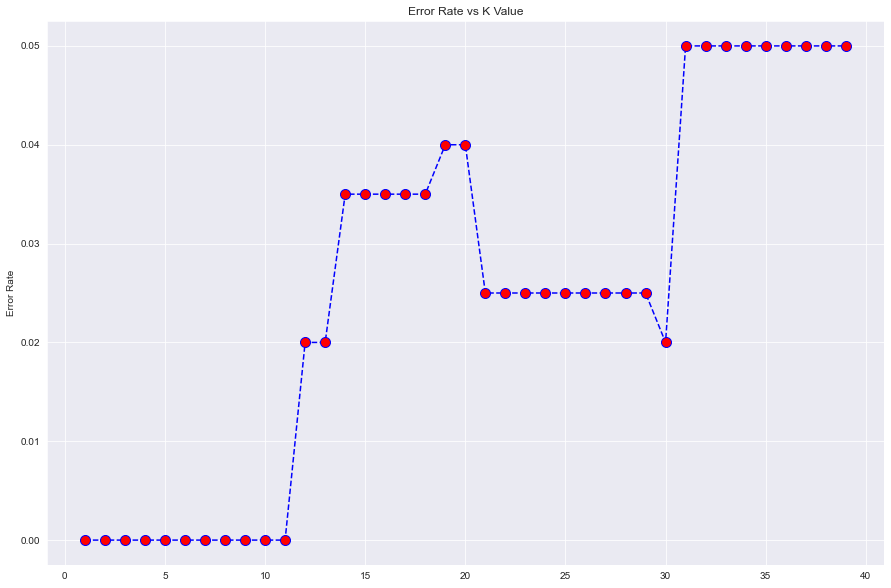

In [123]:
# Now we will plot the prediction error rates of different k values
plt.figure(figsize=(15,10))
plt.plot(range(1,40),error_rate, color="blue", linestyle="--",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel="K Value"
plt.ylabel("Error Rate")